<a href="https://colab.research.google.com/github/swathi-ganesula/Machine-Learning/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Nearest Neighbors

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfheart=pd.read_csv("/content/heart.csv")

In [ ]:
dfheart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
dfheart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
usecols=[ 'trestbps', 'chol', 'fbs','thalach','ca', 'thal', 'oldpeak']

In [ ]:
usecols

['trestbps', 'chol', 'fbs', 'thalach', 'ca', 'thal', 'oldpeak']

In [ ]:
dfheart[usecols]

,trestbps,chol,fbs,thalach,ca,thal,oldpeak
0,125,212,0,168,2,3,1.0
1,140,203,1,155,0,3,3.1
2,145,174,0,125,0,3,2.6
3,148,203,0,161,1,3,0.0
4,138,294,1,106,3,2,1.9
...,...,...,...,...,...,...,...
1020,140,221,0,164,0,2,0.0
1021,125,258,0,141,1,3,2.8
1022,110,275,0,118,1,2,1.0
1023,110,254,0,159,0,2,0.0


In [ ]:
import time

In [ ]:
for c in usecols:
  print(c)
  time.sleep(1)



trestbps
chol
fbs
thalach
ca
thal
oldpeak


In [ ]:
for c in usecols:
  print(dfheart[c])
  time.sleep(1)


0       125
1       140
2       145
3       148
4       138
       ... 
1020    140
1021    125
1022    110
1023    110
1024    120
Name: trestbps, Length: 1025, dtype: int64
0       212
1       203
2       174
3       203
4       294
       ... 
1020    221
1021    258
1022    275
1023    254
1024    188
Name: chol, Length: 1025, dtype: int64
0       0
1       1
2       0
3       0
4       1
       ..
1020    0
1021    0
1022    0
1023    0
1024    0
Name: fbs, Length: 1025, dtype: int64
0       168
1       155
2       125
3       161
4       106
       ... 
1020    164
1021    141
1022    118
1023    159
1024    113
Name: thalach, Length: 1025, dtype: int64
0       2
1       0
2       0
3       1
4       3
       ..
1020    0
1021    1
1022    1
1023    0
1024    1
Name: ca, Length: 1025, dtype: int64
0       3
1       3
2       3
3       3
4       2
       ..
1020    2
1021    3
1022    2
1023    2
1024    3
Name: thal, Length: 1025, dtype: int64
0       1.0
1       3.1
2       2.6


error detection

In [ ]:
for c in usecols:
  q1=dfheart[c].quantile(0.25)
  q3=dfheart[c].quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  dfheart[c]=dfheart[c].map(lambda x: lower if x<lower else upper if x>upper else x)

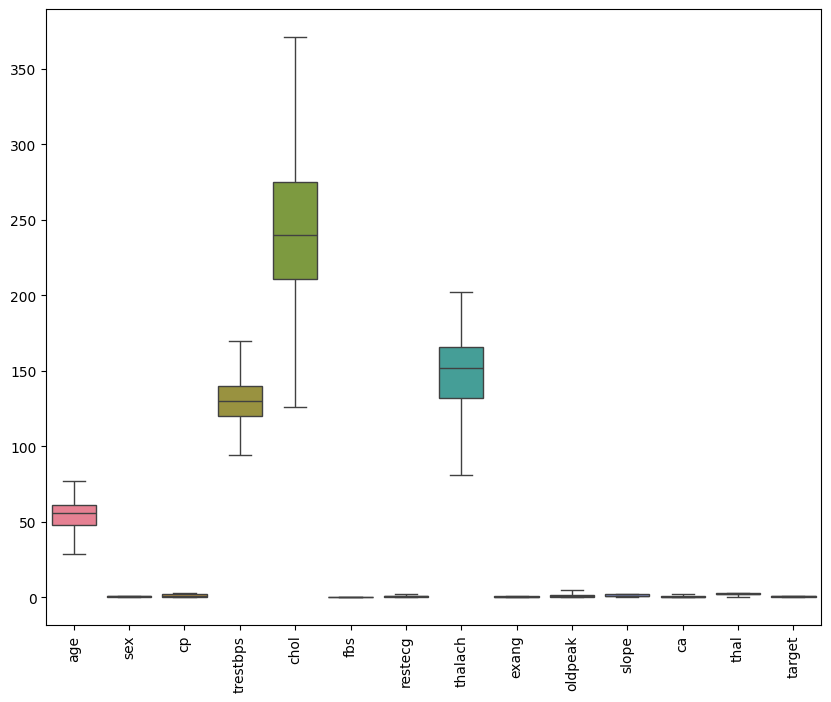

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(dfheart)
plt.xticks(rotation=90)
plt.show()

encoding

In [ ]:
dfheart.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,float64
chol,float64
fbs,float64
restecg,int64
thalach,float64
exang,int64
oldpeak,float64


In [ ]:
dfheart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0,0


data seperation

In [ ]:
dfheart.drop("target",axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0
1021,60,1,0,125.0,258.0,0.0,0,141.0,1,2.8,1,1.0,3.0
1022,47,1,0,110.0,275.0,0.0,0,118.0,1,1.0,1,1.0,2.0
1023,50,0,0,110.0,254.0,0.0,0,159.0,0,0.0,2,0.0,2.0


In [ ]:
X=dfheart.drop("target",axis=1)

In [ ]:
y=dfheart["target"]

In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0
1021,60,1,0,125.0,258.0,0.0,0,141.0,1,2.8,1,1.0,3.0
1022,47,1,0,110.0,275.0,0.0,0,118.0,1,1.0,1,1.0,2.0
1023,50,0,0,110.0,254.0,0.0,0,159.0,0,0.0,2,0.0,2.0


imbalance

In [ ]:
y.value_counts()

,count
target,
1,526
0,499


<Axes: xlabel='target'>

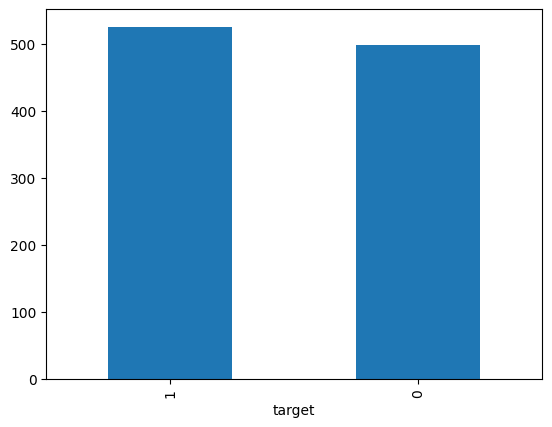

In [ ]:
y.value_counts().plot(kind="bar")

data splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [ ]:
X_train.shape,y_test.shape

((820, 13), (205,))

In [ ]:
y_train.shape

(820,)

model building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_model

KNeighborsClassifier()

In [ ]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn_model.score(X_test,y_test)

0.7024390243902439

auto ml


In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
rfc_model=RandomForestClassifier()

In [ ]:
abc_model=AdaBoostClassifier()

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
dt_model=DecisionTreeClassifier()

In [ ]:
lr_model=LogisticRegression()

In [ ]:
knn_model=KNeighborsClassifier()

In [ ]:
models=[rfc_model,abc_model,gbc,dt_model,lr_model,knn_model,svm_model]

In [ ]:
svm_model=SVC()

In [ ]:
models

[RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 DecisionTreeClassifier(),
 LogisticRegression(),
 KNeighborsClassifier(),
 SVC()]

In [ ]:
for m in models:
  m.fit(X_train,y_train)
  sc=m.score(X_test,y_test)
  print(m,"====>",sc)
  print()

RandomForestClassifier() ====> 1.0

AdaBoostClassifier() ====> 0.8634146341463415

GradientBoostingClassifier() ====> 0.9658536585365853

DecisionTreeClassifier() ====> 0.9804878048780488

LogisticRegression() ====> 0.8682926829268293

KNeighborsClassifier() ====> 0.7024390243902439

SVC() ====> 0.7317073170731707



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn2=KNeighborsClassifier()

In [ ]:
score=cross_val_score(knn2,X,y,cv=20,n_jobs=-1)

In [ ]:
score

array([0.82692308, 0.75      , 0.73076923, 0.76923077, 0.75      ,
       0.76470588, 0.84313725, 0.66666667, 0.74509804, 0.84313725,
       0.70588235, 0.80392157, 0.74509804, 0.66666667, 0.80392157,
       0.76470588, 0.8627451 , 0.7254902 , 0.68627451, 0.76470588])

In [ ]:
score.mean()

np.float64(0.7609539969834087)

In [ ]:
knn3=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn3

KNeighborsClassifier()

In [ ]:
score1=cross_val_score(knn3,X,y,cv=30,n_jobs=-1)

In [ ]:
score1

array([0.82857143, 0.82857143, 0.71428571, 0.77142857, 0.68571429,
       0.85294118, 0.76470588, 0.79411765, 0.70588235, 0.76470588,
       0.79411765, 0.67647059, 0.85294118, 0.85294118, 0.85294118,
       0.67647059, 0.85294118, 0.73529412, 0.85294118, 0.67647059,
       0.61764706, 0.73529412, 0.73529412, 0.79411765, 0.79411765,
       0.91176471, 0.67647059, 0.70588235, 0.67647059, 0.76470588])

In [ ]:
score1.mean()

np.float64(0.7648739495798318)

In [ ]:
rfc1=RandomForestClassifier()

In [ ]:
rfc_score=cross_val_score(rfc1,X_train,y_train,cv=40,n_jobs=-1)

In [ ]:
rfc_score

array([0.95238095, 1.        , 1.        , 1.        , 0.95238095,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.95238095, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.95      , 1.        ])

In [ ]:
rfc_score.mean()

np.float64(0.9951785714285715)

In [ ]:
rfc2=RandomForestClassifier()

In [ ]:
rfc2

RandomForestClassifier()

In [ ]:
rfc2_score=cross_val_score(rfc2,X,y,n_jobs=-1,cv=40)

In [ ]:
rfc2_score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [ ]:
rfc2_score.mean()

np.float64(1.0)